## Image Watermarking

In this project I will add an image and text water mark using OpenCV. 

In [ ]:
# import libraries
import cv2
import numpy as np
import requests
from PIL import Image

Reading the image to be water marked from URL.. 

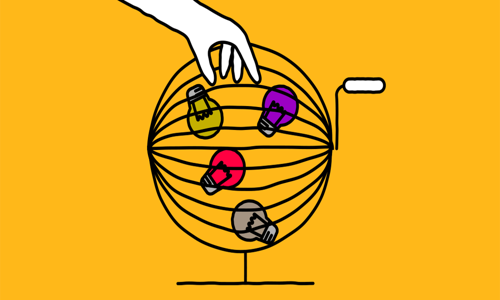

In [ ]:
# read image from url
image = Image.open(requests.get("https://media.nesta.org.uk/images/Predictions-2019_Twitter_02.max-1200x600.png", stream=True).raw)
# two separate variables, 1 for logo watermark the other for the text watermark
image_logow = image.resize((500,300))
image_textw = image.resize((500,300))
image_logow

Now to grab the logo we will use for the watermark using the URL 

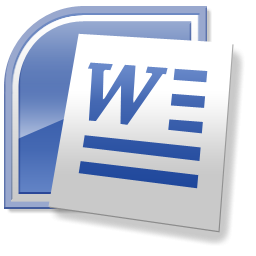

In [ ]:
# reading the logo
logo = Image.open(requests.get("https://www.freeiconspng.com/thumbs/word-icon-png/microsoft-word-icon-5.png", stream=True).raw)
logo

To use these images I will convert them into RBG format and store them as a numpy array.  Similary, we will aslo extract the shape.. ie,  the height and width. 

In [ ]:
image_logow = np.array(image_logow.convert("RGB"))
h_image, w_image, _ = image_logow.shape
logo = np.array(logo.convert("RGB"))
h_logo, w_logo, _ = logo.shape

I will place the watermark in the center of the image so it is required to calculate where that is.   

In [ ]:
# calculate the centre
center_y = int(h_image / 2) # store as integer
center_x = int(w_image / 2)

# find the corners
top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo

Next, its required to find the region of interest which is the area I need to place the watermark.   Here I will find the ROI using the coordinates that I calculated.  

In [ ]:
# get ROI 
roi = image_logow[top_y: bottom_y, left_x: right_x]
#add the logo to the roi
result = cv2.addWeighted(roi, 1, logo, 1, 0)
#replace the ROI on the image
image_logow[top_y: bottom_y, left_x: right_x] = result

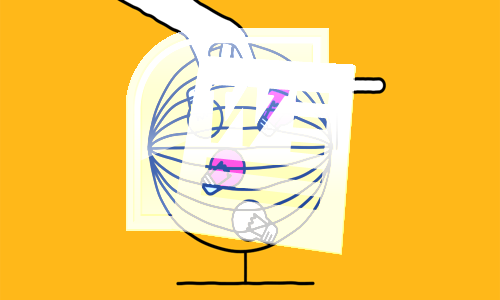

In [ ]:
# plotting logo watermark image
img = Image.fromarray(image_logow)
img

As you can see the logo has been placed over the original image! Albeit,  probably not the best choice of images.  This can be changed into your company logo or name etc.   Now.. let's take a look at the text watermark using the putText() function of OpenCV. 


In [ ]:
# text watermark
image_text = np.array(image_textw.convert("RGB"))
cv2.putText(image_text, text="Rich Gregson", org=(w_image - 130, h_image - 10), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5, color=(255, 255, 255,),
            thickness=2, lineType=cv2.LINE_4);

Plot the image! 

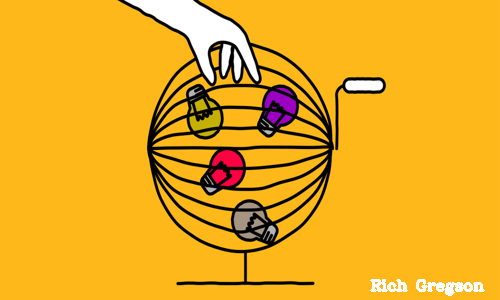

In [ ]:
# plot text image
timg = Image.fromarray(image_text, "RGB")
timg